In [73]:
from __future__ import print_function, division

import pandas as pd
%matplotlib inline
import importlib
import thinkdsp
import thinkplot
import pyaudio
import wave


from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import os
import matplotlib.pyplot as plt
import librosa
importlib.reload(thinkdsp)
import seaborn as sns

sns.set_style(style='whitegrid')
# darkgrid, whitegrid, dark, white, ticks

In [2]:
# config
path = '/Users/danielmlow/Dropbox/shbt/acoustics/notes_speech/'
output_dir = './../09/'

## Record a signal and save it

In [93]:
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 8100 #Make sure it's what you want
CHUNK = 1024
RECORD_SECONDS = 1.5

WAVE_OUTPUT_FILENAME = input()+".wav"
 
audio = pyaudio.PyAudio()
 
# start Recording
stream = audio.open(format=FORMAT, channels=CHANNELS,
                rate=RATE, input=True, output=True,
                frames_per_buffer=CHUNK)
print("recording...")

frames = []
 
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)
print("finished recording")
 
 
# stop Recording
stream.stop_stream()
stream.close()
audio.terminate()
 
waveFile = wave.open(output_dir+WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()


[u]
recording...
finished recording


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


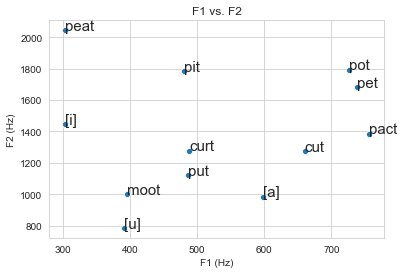

In [95]:
d = {
    'pact': [756.05, 1386.20],
    'peat': [302.91, 2045.3],
    'moot': [396.21, 1001.80],
    'pet': [738.22, 1684.14],
    'pot': [726.63, 1794.64],
    'pit': [481.2, 1786.72],
    'cut': [660.25, 1274.94],
    'curt': [488.20, 1278.68],
    'put': [487.15, 1122.37],
    '[i]': [303.72, 1448.47],
    '[a]': [598.45, 984.97],
    '[u]': [391.4, 785.27],}

plt.clf()
words = list(d.items())
F1s = [n[1][0] for n in words]
F2s = [n[1][1] for n in words]
labels = [n[0] for n in words]
sns.scatterplot(x=F1s, y=F2s)

for label, x, y in zip(labels, F1s, F2s):
    plt.annotate(
        label,
        xy=(x, y), fontsize=15)

plt.legend()
plt.xlabel('F1 (Hz)')
plt.ylabel('F2 (Hz)')
plt.title('F1 vs. F2')
plt.savefig(output_dir+'f1_vs_f2', format='eps', dpi=100)


In [30]:
list(d.items())


[('pact', [756.05, 1386.2]),
 ('peat', [302.91, 2045.3]),
 ('moot', [396.21, 1001.8]),
 ('pet', [738.22, 1684.14]),
 ('pot', [726.63, 1794.64]),
 ('pit', [481.2, 1786.72]),
 ('cut', [660.25, 1274.94]),
 ('curt', [488.2, 1278.68]),
 ('put', [487.15, 1122.37])]

## Create a signal and play it

In [55]:
# signal = thinkdsp.TriangleSignal(200)
signal = thinkdsp.GlottalSignal(500, 1.0, offset=0)
# signal = thinkdsp.SinSignal(500, 1.0, offset=0)
duration = signal.period*10
segment = signal.make_wave(duration, framerate=10000)
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

## Plot signal

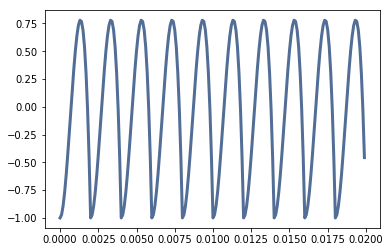

In [4]:
segment.plot()

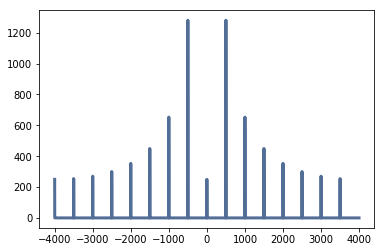

In [5]:
# 
plt.clf()
wave = thinkdsp.read_wave(os.path.join(path, "wave1.wav"))
spectrum = wave.make_spectrum(full=True, normalization=None)
wave.apodize()
spectrum.plot()


## Cut beginning and end silences of wav files

In [28]:
from pydub import AudioSegment

In [29]:
def save_wav(output_path = None, audio, CHANNELS, FORMAT )
    with open wave.open(output_path, 'wb') as waveFile:
        waveFile.setnchannels(CHANNELS)
        waveFile.setsampwidth(audio.get_sample_size(FORMAT))
        waveFile.setframerate(RATE)
        waveFile.writeframes(b''.join(frames))


def detect_leading_silence(sound, silence_threshold=-50.0, chunk_size=10):
    '''
    sound is a pydub.AudioSegment
    silence_threshold in dB
    chunk_size in ms

    iterate over chunks until you find the first one with sound
    '''
    trim_ms = 0 # ms

    assert chunk_size > 0 # to avoid infinite loop
    while sound[trim_ms:trim_ms+chunk_size].dBFS < silence_threshold and trim_ms < len(sound):
        trim_ms += chunk_size

    return trim_ms


sound = AudioSegment.from_file(output_dir+"pact.wav", format="wav")

start_trim = detect_leading_silence(sound)
end_trim = detect_leading_silence(sound.reverse())

duration = len(sound)    
trimmed_sound = sound[start_trim:duration-end_trim]

output_path = output_dir+WAVE_OUTPUT_FILENAME



In [31]:
duration

1391

# Problem set questions 

## 1.a. Load a signal and observe waveform to classify it:

In [10]:
output_dir, "pact.wav"

('./../09/', 'pact.wav')

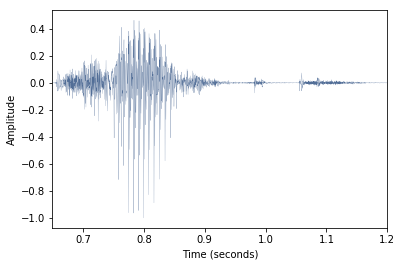

In [27]:
plt.clf()
wave = thinkdsp.read_wave(os.path.join(output_dir, "pact.wav"))
thinkplot.config(xlim=[0.65,1.2],xlabel='Time (seconds)', ylabel='Amplitude') # xlim = [0,0.02] to see one cycle for instance
wave.plot(linewidth=.2)
# thinkplot.save(root=os.path.join(path, 'images/waveform_w'+str(i)), formats=['png'])

In [56]:
# # plot wave form
# for i in range(1,4):
#     plt.clf()
#     wave = thinkdsp.read_wave(os.path.join(output_path, "wave"+str(i)+".wav"))
#     thinkplot.config(xlim= [0,0.02], xlabel='Time (seconds)', ylabel='Amplitude')
#     wave.plot()
#     thinkplot.save(root=os.path.join(path, 'images/waveform_w'+str(i)), formats=['png'])
    

Writing /Users/danielmlow/Dropbox/shbt/acoustics/notes_speech/images/waveform_w1.png
Writing /Users/danielmlow/Dropbox/shbt/acoustics/notes_speech/images/waveform_w2.png
Writing /Users/danielmlow/Dropbox/shbt/acoustics/notes_speech/images/waveform_w3.png


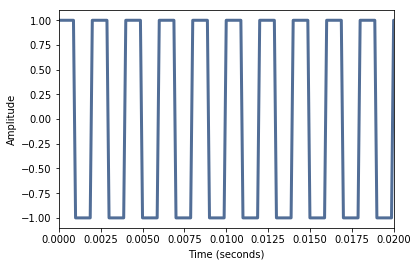

In [7]:
thinkplot.config(xlim= [0,0.02], xlabel='Time (seconds)', ylabel='Amplitude')
wave.plot()

## 1.b. What is the periodicity of each waveform? 

In [8]:
# One method is seeing where the vector goes back to the starting y value to get .
[(n*10).round(2) for n in list(wave.ys[:17])] #If on 17, the cycle repeats, on 16 the cycle ends.


#  Another method is doing the spectrum analysis and seeing what the frequency is to then infer the periodicity (see section 1.3.)

[10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 10.0]

In [10]:
# plot 2 msec, which is 1 cycle:
for i in range(1,4):
    wave = thinkdsp.read_wave(os.path.join(path,"wave"+str(i)+".wav"))
    thinkplot.config(xlim = [0.040, 0.042], xlabel='Time (seconds)', ylabel='Amplitude ')
    wave.plot()
    thinkplot.save(root=os.path.join(path, 'images/period_w'+str(i)), formats=['png'])

Writing /Users/danielmlow/Dropbox/shbt/acoustics/notes_speech/images/period_w1.png
Writing /Users/danielmlow/Dropbox/shbt/acoustics/notes_speech/images/period_w2.png
Writing /Users/danielmlow/Dropbox/shbt/acoustics/notes_speech/images/period_w3.png


## Make spectrums

In [11]:
spectrum = wave.make_spectrum(full=True)
spectrum.plot()

for i in range(1,4):
    wave = thinkdsp.read_wave(os.path.join(path,"wave"+str(i)+".wav"))
    thinkplot.config(xlabel='Frequency (Hz)',
                     ylabel='Amplitude')
    spectrum = wave.make_spectrum(full=True)
    spectrum.plot()
    thinkplot.save(root=os.path.join(path, 'images/spectrum_w'+str(i)), formats=['png'])


Writing /Users/danielmlow/Dropbox/shbt/acoustics/notes_speech/images/spectrum_w1.png
Writing /Users/danielmlow/Dropbox/shbt/acoustics/notes_speech/images/spectrum_w2.png
Writing /Users/danielmlow/Dropbox/shbt/acoustics/notes_speech/images/spectrum_w3.png


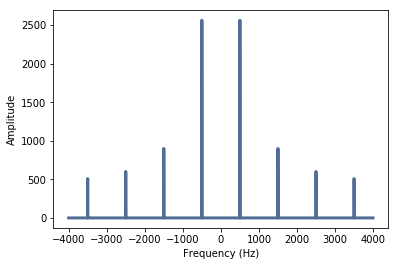

In [12]:
# plot wave 3
thinkplot.config(xlabel='Frequency (Hz)',
                     ylabel='Amplitude')
    spectrum = wave.make_spectrum(full=True)
    spectrum.plot()

# 3. Downsample

In [149]:
y, s = librosa.load('wave1.wav', sr=800) 
y.shape

(400,)

In [94]:
# Original wave
wave = thinkdsp.read_wave(os.path.join(path,"wave3.wav"))
wave.make_audio()

In [151]:
def sample(wave, factor):
    """Simulates sampling of a wave.
    
    wave: Wave object
    factor: ratio of the new framerate to the original
    """
    ys = wave.ys[::factor]
    sampled = thinkdsp.Wave(ys, framerate=wave.framerate/factor) 
    return sampled

## 3.1. sample every 2

In [152]:
# sample every 2
sampled = sample(wave, 2)
print(sampled.framerate) #I changed the framerate to 4000, because now there 
print(len(sampled.ys)) #I changed the framerate to 4000, because now there 
sampled.make_audio()

4000.0
2000


In [153]:
# save spectrum
spectrum = sampled.make_spectrum(full=True)
thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude')
spectrum.plot()
thinkplot.save(root=os.path.join(path, 'images/spectrum_w3_subsample_x2'), formats=['png'])

Writing /Users/danielmlow/Dropbox/shbt/acoustics/notes_speech/images/spectrum_w3_subsample_x2.png


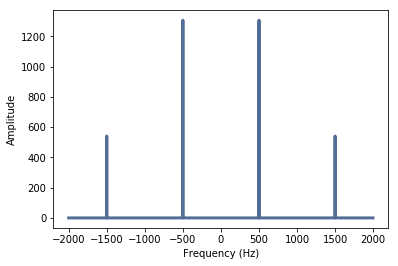

In [154]:
# plot it
thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude')
spectrum.plot()

## 3.2. sample every 10

In [161]:
sampled = sample(wave, 10)
sampled.make_audio()
# you can't hear it cause it is very short.

In [162]:
spectrum = sampled.make_spectrum(full=True)
thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude')
spectrum.plot()
thinkplot.save(root=os.path.join(path, 'images/spectrum_w3_subsample_x10'), formats=['png'])


Writing /Users/danielmlow/Dropbox/shbt/acoustics/notes_speech/images/spectrum_w3_subsample_x10.png


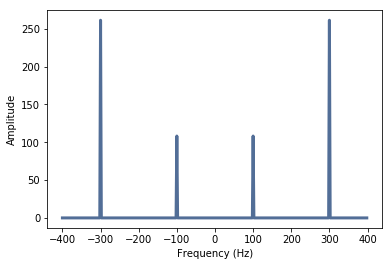

In [163]:
thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude')
spectrum.plot()